# $The$ $Stochastic$ $Alpha$ $Beta$ $Rho$ $(SABR)$ $model.$

In mathematical finance, the SABR model is a stochastic volatility model, which attempts to capture the volatility smile in derivatives markets. The name stands for "stochastic alpha, beta, rho", referring to the parameters of the model. The SABR model is widely used by practitioners in the financial industry, especially in the interest rate derivative markets.

SABR model (Hagan et al. 2002) was first introduced in 2002 and has since become an industry-standard fast option pricing model for equity, FX, and interest rate options\
• Proposes a constant elasticity of variance approach to volatility\
• Uses two factors to explain forward rate dynamics\
• First factor defines the usual GBM process of the forward rate\
• Second factor defines evolution of the diffusion term\
• The two random walk processes are linked by a correlation coefficient

The SABR model contains 3 critically important
CONSTANTS that must all be calibrated to market data as inputs to the model:\
• Beta: the CEV parameter, constant for each forward rate under consideration that determines the underlying distribution of the forward process\
• Nu: the volatility of volatility, constant for each forward rate process\
• Rho: the correlation between the forward and diffusion processes\
• These three inputs then determine the SABR Alpha, which is computed internally\
• The resulting output can then be converted back into Black-76 implied volatility and used for pricing options



The SABR model of Hagan is described by the following 3 equations:\
$dF_t = \alpha_t F^{\beta}dW_t^{(1)}$ \
$d\alpha_t = \nu\alpha_tdW_t^{(2)}$ \
$dW_t^{(1)}W_t^{(2)} = \rho$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's introduce parameters for the Hagan.
 here:
$\alpha - initial$ $volatility$\
$\beta - forward$ $rate$ $exponent$\
$\rho - correlation$\
$\nu - vol$ $of$ $volatility$

\
The parameters satisfy conditions $\alpha \ge 0;$      $ 0 \le \beta \le 1;$    $-1 \le \rho \le 1;$     $\nu \ge 0$

In [2]:
CP = 'call'
alpha = .3
beta = .5
rho = -.5
nu = .4
f_0 = 1.0
time_y = 1.0  # time in years

In [3]:
def hagan_iv(K, T, f, alpha, beta, rho, nu):
    # We make sure that the input is of array type

    if type(K) == float:
        K = np.array([K])
    if K is not np.array:
        K = np.array(K).reshape([len(K), 1])

    # The strike prices cannot be too close to 0

    K[K < 1e-10] = 1e-10

    z = nu / alpha * np.power(f * K, (1.0 - beta) / 2.0) * np.log(f / K)
    x_z = np.log((np.sqrt(1.0 - 2.0 * rho * z + z * z) + z - rho) / (1.0 - rho))
    A = alpha / (np.power(f * K, ((1.0 - beta) / 2.0)) * (1.0 + np.power(1.0 - beta, 2.0) / 24.0 *
                                                          np.power(np.log(f / K), 2.0) + np.power((1.0 - beta),
                                                                                                  4.0) / 1920.0 *
                                                          np.power(np.log(f / K), 4.0)))
    B1 = 1.0 + (np.power((1.0 - beta), 2.0) / 24.0 * alpha * alpha / (np.power((f * K),
                                                                               1 - beta)) + 1 / 4 * (
                        rho * beta * nu * alpha) / (np.power((f * K),
                                                             ((1.0 - beta) / 2.0))) + (
                        2.0 - 3.0 * rho * rho) / 24.0 * nu * nu) * T
    impVol = A * (z / x_z) * B1
    B2 = 1.0 + (np.power(1.0 - beta, 2.0) / 24.0 * alpha * alpha /
                (np.power(f, 2.0 - 2.0 * beta)) + 1.0 / 4.0 * (rho * beta * nu *
                                                               alpha) / np.power(f, (1.0 - beta)) + (
                        2.0 - 3.0 * rho * rho) / 24.0 * nu * nu) * T

    # Special treatment of ATM strike value

    impVol[np.where(K == f)] = alpha / np.power(f, (1 - beta)) * B2
    return impVol

# Let's show how different parameters affect SABR model.

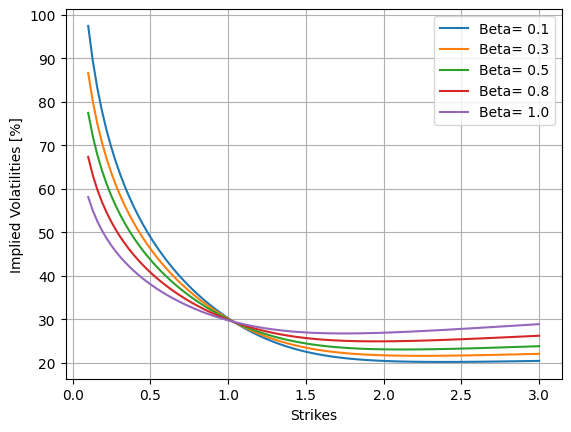

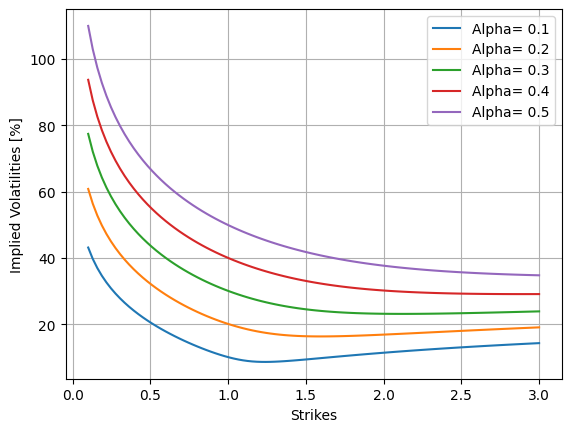

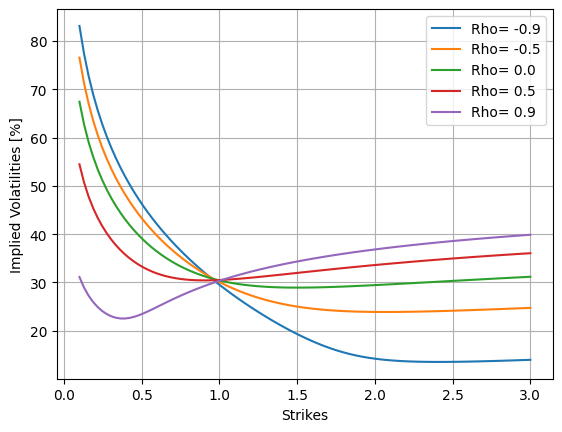

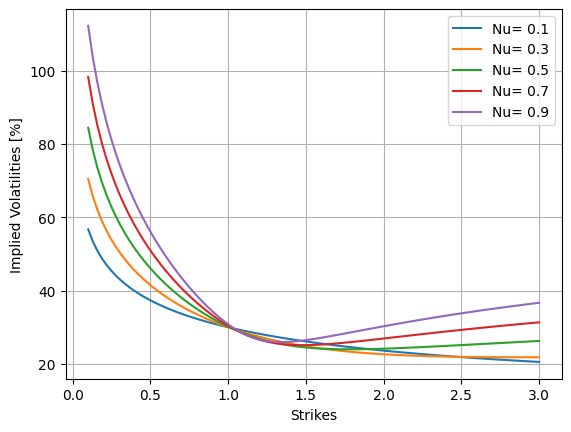

In [4]:
strikes = np.linspace(0.1, 3, 100)

# Figure 1, effect of parameter beta on the implied volatility

Beta = [0.1, 0.3, 0.5, 0.75, 1]
legendL = []
plt.figure(1)
for betaTemp in Beta:
    iv = hagan_iv(strikes, time_y, f_0, alpha, betaTemp, rho, nu) * 100
    plt.plot(strikes, iv)
    legendL.append(('Beta= {0:.1f}').format(betaTemp))

plt.xlabel('Strikes')
plt.ylabel('Implied Volatilities [%]')
plt.grid()
plt.legend(legendL)


# Figure 2, effect of alpha on the implied volatility

Alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
legendL = []
plt.figure(2)
for alphaTemp in Alpha:
    iv = hagan_iv(strikes, time_y, f_0, alphaTemp, beta, rho, nu) * 100
    plt.plot(strikes, iv)
    legendL.append(('Alpha= {0:.1f}').format(alphaTemp))

plt.xlabel('Strikes')
plt.ylabel('Implied Volatilities [%]')
plt.grid()
plt.legend(legendL)


# Figure 3, effect of rho on the implied volatility

Rho = [-0.9, -0.45, 0.0, 0.45, 0.9]
legendL = []
plt.figure(3)
for rhoTemp in Rho:
    iv = hagan_iv(strikes, time_y, f_0, alpha, beta, rhoTemp, nu) * 100
    plt.plot(strikes, iv)
    legendL.append(('Rho= {0:.1f}').format(rhoTemp))

plt.xlabel('Strikes')
plt.ylabel('Implied Volatilities [%]')
plt.grid()
plt.legend(legendL)


# Figure 4, effect of nu on the implied volatility

Nu = [0.1, 0.3, 0.5, 0.7, 0.9]
legendL = []
plt.figure(4)
for nuTemp in Nu:
    iv = hagan_iv(strikes, time_y, f_0, alpha, beta, rho, nuTemp) * 100
    plt.plot(strikes, iv)
    legendL.append(('Nu= {0:.1f}').format(nuTemp))

plt.xlabel('Strikes')
plt.ylabel('Implied Volatilities [%]')
plt.grid()
plt.legend(legendL)


Different implied volatility shapes under Hagan’s implied volatility parametrization, depending on different model parameters.

In figures given the effect of different model parameters on the implied volatility shapes is shown. Notice that both parameters $\beta$ and $\rho$ have an effect on the implied volatility skew. In practice, $\beta$  is often fixed, whereas $\rho$ is used in a calibration. Parameter $\alpha$ controls the level of the implied volatility smile and $\nu$ the magnitude of the curvature of the smile.

## Alpha is the Core Parameter, Derived from All Others

• Alpha is not observable and cannot be approximated from historical data\
• Calibration procedures must be used to ensure that all parameters return back close approximations to observed market volatilities



## Beta is the "Shape" Parameter

• $\beta = 0 $ implies normally distributed forward rates (appropriate to use with stock options)\
• $\beta = 1 $ implies lognormally distributed forward rates (usually used with swaptions)\
• Anything in between results in a "mixed" distribution\
• Generally, $\beta$ close to 0 is useful for rates that never go negative, while $\beta$ close to 1 is useful for rates that are close to zero now\
• In practice, setting $\beta = 0.5$ is quite adequate for most purposes



## Rho Affects the "Slope" of the Modeled Volatility Smile

• $\rho$ affects the "tilt", or skewness, of the volatility smile in the market\
• This can be observed heuristically by looking at the profiles of risk reversals in the market\
• A risk reversal consists of one long and one short option of different types, struck equidistant from ATM\
• A relatively flat tilt indicates a low Rho parameter, and a relatively sharp tilt indicates a high Rho parameter\
• Generally, Rho tends to become more strongly negative for longer-dated option maturities, though this is not universally true

## Nu Affects the "Height" of the Volatility Smile

• $\nu$ affects the overall "height" of the smile\
• This can be observed heuristically in the market by looking at the prices for straddles and strangles\
• These consist of two different long options struck either ATM, or at strikes equidistant from ATM\
• Generally, $\nu$ tends to be quite high for short-maturity options, and decreases as time to maturity increases

In [5]:
import scipy.stats as st
import scipy.optimize as optimize
import enum

In [7]:
def LocalVarianceBasedOnSABR(s0, frwd, r, alpha, beta, rho, volvol):
    # Define shock size for approximating derivatives

    dt = 0.001
    dx = 0.001

    # Function for Hagan's implied volatility approximation

    sigma = lambda x, t: hagan_iv(x, t, frwd, alpha, beta, rho, volvol)

    # Derivatives

    dsigmadt = lambda x, t: (sigma(x, t + dt) - sigma(x, t)) / dt
    dsigmadx = lambda x, t: (sigma(x + dx, t) - sigma(x - dx, t)) / (2.0 * dx)
    d2sigmadx2 = lambda x, t: (sigma(x + dx, t) + sigma(x - dx, t) - 2.0 * sigma(x, t)) / (dx * dx)
    omega = lambda x, t: sigma(x, t) * sigma(x, t) * t
    domegadt = lambda x, t: sigma(x, t) ** 2.0 + 2.0 * t * sigma(x, t) * dsigmadt(x, t)
    domegadx = lambda x, t: 2.0 * t * sigma(x, t) * dsigmadx(x, t)
    # d2omegadx2 = lambda x,t: 2.0*t*(dsigmadx(x,t))**2.0 + 2.0*t*sigma(x,t)*d2sigmadx2(x,t)
    d2omegadx2 = lambda x, t: 2.0 * t * np.power(dsigmadx(x, t), 2.0) + 2.0 * t * sigma(x, t) * d2sigmadx2(x, t)

    term1 = lambda x, t: 1.0 + x * domegadx(x, t) * (0.5 - np.log(x / (s0 * np.exp(r * t))) / omega(x, t))
    term2 = lambda x, t: 0.5 * np.power(x, 2.0) * d2omegadx2(x, t)
    term3 = lambda x, t: 0.5 * np.power(x, 2.0) * np.power(domegadx(x, t), 2.0) * (
            -1.0 / 8.0 - 1.0 / (2.0 * omega(x, t)) \
            + np.log(x / (s0 * np.exp(r * t))) * np.log(x / (s0 * np.exp(r * t))) / (2 * omega(x, t) * omega(x, t)))

    # Final expression for local variance

    sigmalv2 = lambda x, t: (domegadt(x, t) + r * x * domegadx(x, t)) / (term1(x, t) + term2(x, t) + term3(x, t))
    return sigmalv2

In [8]:
def BS_Call_Put_Option_Price(CP, S_0, K, sigma, tau, r):
    if K is list:
        K = np.array(K).reshape([len(K), 1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0))
          * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    if CP == 'call':
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif CP == 'put':
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1) * S_0
    return value

In [9]:
# Implied volatility method

def ImpliedVolatility(CP, marketPrice, K, T, S_0, r):
    # To determine initial volatility we define a grid for sigma
    # and interpolate on the inverse function

    sigmaGrid = np.linspace(0, 2, 200)
    optPriceGrid = BS_Call_Put_Option_Price(CP, S_0, K, sigmaGrid, T, r)
    sigmaInitial = np.interp(marketPrice, optPriceGrid, sigmaGrid)
    print("Initial volatility = {0}".format(sigmaInitial))

    # Use already determined input for the local-search (final tuning)

    func = lambda sigma: np.power(BS_Call_Put_Option_Price(CP, S_0, K, sigma, T, r) - marketPrice, 1.0)
    impliedVol = optimize.newton(func, sigmaInitial, tol=1e-15)
    print("Final volatility = {0}".format(impliedVol))
    return impliedVol

In [10]:
def EUOptionPriceFromMCPaths(CP, S, K, T, r):
    # S is a vector of Monte Carlo samples at T

    if CP == 'call':
        return np.exp(-r * T) * np.mean(np.maximum(S - K, 0.0))
    elif CP == 'put':
        return np.exp(-r * T) * np.mean(np.maximum(K - S, 0.0))

In [11]:
def mainCalculationSABR(beta=1.0, rho=0.0, volvol=0.2, s0=1.0, T=10.0, r=0.05, alpha=0.2, CP='call', NoOfPaths=25000):
    # For the SABR model we take beta =1 and rho =0 (as simplification)

    # Other model parameters
    f_0 = s0 * np.exp(r * T)

    # Monte Carlo settings

    NoOfSteps = (int)(100 * T)

    # We define the market to be driven by Hagan's SABR formula
    # Based on this formula we derive the local volatility/variance

    sigma = lambda x, t: hagan_iv(x, t, f_0, alpha, beta, rho, volvol)

    # Local variance based on the Hagan's SABR formula

    sigmalv2 = LocalVarianceBasedOnSABR(s0, f_0, r, alpha, beta, rho, volvol)

    # Monte Carlo simulation

    dt = T / NoOfSteps
    np.random.seed(4)
    Z = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    S = np.zeros([NoOfPaths, NoOfSteps + 1])

    S[:, 0] = s0;
    time = np.zeros([NoOfSteps + 1, 1])

    for i in range(0, NoOfSteps):

        # This condition is necessary as for t=0 we cannot compute implied
        # volatilities

        if time[i] == 0.0:
            time[i] = 0.0001

        # print('current time is {0}'.format(time[i]))

        # Standarize Normal(0,1)

        Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])

        # Compute local volatility

        S_i = np.array(S[:, i]).reshape([NoOfPaths, 1])
        temp = sigmalv2(S_i, time[i])
        sig = np.real(temp)
        np.nan_to_num(sig)

        # Because of discretizations we may encouter negative variance which
        # is set to 0 here.

        sig = np.maximum(sig, 1e-14)
        sigmaLV = np.sqrt(sig)

        # Stock path

        S[:, i + 1] = S[:, i] * (1.0 + r * dt + sigmaLV.transpose() * Z[:, i] * np.sqrt(dt))

        # We force that at each time S(t)/M(t) is a martingale

        S[:, i + 1] = S[:, i + 1] - np.mean(S[:, i + 1]) + s0 * np.exp(r * time[i])

        # Make sure that after moment matching we don't encounter negative stock values

        S[:, i + 1] = np.maximum(S[:, i + 1], 1e-14)

        # Adjust time

        time[i + 1] = time[i] + dt

    # Plot some results

    K = np.linspace(0.2, 5.0, 25)
    # c_n = np.array([-1.5, -1.0, -0.5,0.0, 0.5, 1.0, 1.5])
    # K= s0*np.exp(r*T) * np.exp(0.1 * c_n * np.sqrt(T))
    OptPrice = np.zeros([len(K), 1])
    IV_Hagan = np.zeros([len(K), 1])
    IV_MC = np.zeros([len(K), 1])
    for (idx, k) in enumerate(K):
        OptPrice[idx] = EUOptionPriceFromMCPaths(CP, S[:, -1], k, T, r)
        IV_Hagan[idx] = sigma([k], T) * 100.0
        IV_MC[idx] = ImpliedVolatility(CP, OptPrice[idx], k, T, s0, r) * 100.0

    # Plot the option prices

    plt.figure(1)
    plt.plot(K, OptPrice)
    plt.grid()
    plt.xlabel('strike')
    plt.ylabel('option price')

    # Plot the implied volatilities

    plt.figure(2)
    plt.plot(K, IV_Hagan)
    plt.plot(K, IV_MC, '-r')
    plt.grid()
    plt.xlabel('strike')
    plt.ylabel('implied volatility')
    plt.legend(['Hagan', 'Monte Carlo'])
    plt.axis([np.min(K), np.max(K), 0, 40])


Initial volatility = [0.27197487]
Final volatility = [0.27203909]
Initial volatility = [0.25173097]
Final volatility = [0.25175803]
Initial volatility = [0.23374097]
Final volatility = [0.23381172]
Initial volatility = [0.2217417]
Final volatility = [0.22175398]
Initial volatility = [0.21412196]
Final volatility = [0.21414304]
Initial volatility = [0.20916511]
Final volatility = [0.20916988]
Initial volatility = [0.20628419]
Final volatility = [0.20628155]
Initial volatility = [0.20526275]
Final volatility = [0.20525653]
Initial volatility = [0.20518872]
Final volatility = [0.2051835]
Initial volatility = [0.20596581]
Final volatility = [0.2059647]
Initial volatility = [0.20727969]
Final volatility = [0.20728478]
Initial volatility = [0.20886943]
Final volatility = [0.20887863]
Initial volatility = [0.21052603]
Final volatility = [0.21053055]
Initial volatility = [0.21232174]
Final volatility = [0.21233457]
Initial volatility = [0.21420274]
Final volatility = [0.21423595]
Initial volat

/var/folders/xd/xm863f553v750zss70sl77sc0000gn/T/ipykernel_2779/3477140874.py:4: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma, 2.0))


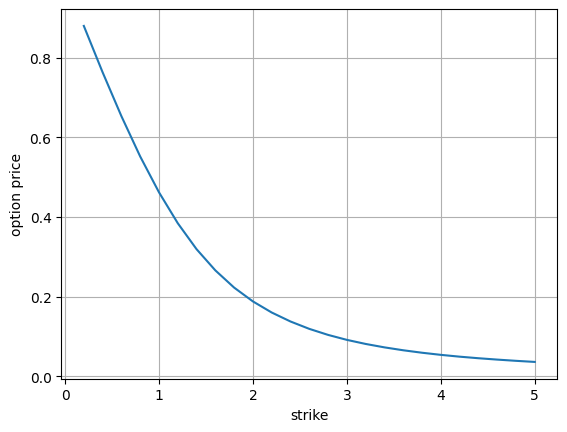

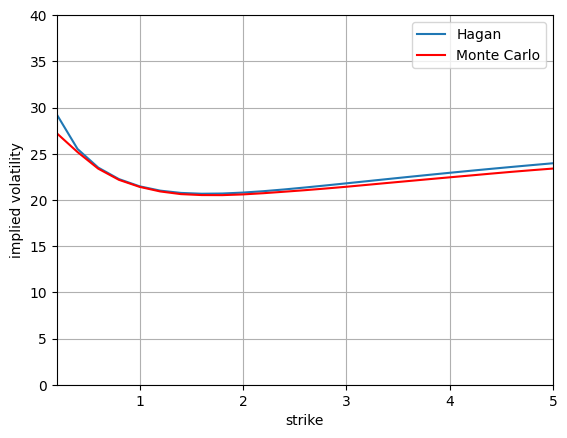

In [14]:
mainCalculationSABR()

Local volatility models resemble very well the implied volatilities that we observe in market option quotes, and they are used as an input to the LV model.
However, LV models may suffer from significant mispricing inaccuracy when dealing with financial derivatives products that depend on the volatility paths and,
generally, on transition density functions. This information is simply not “coded” in the LV model framework.

In [38]:
def sabr_smile(alpha=.3, beta=.5, rho=-.5, nu=.4, time_y=1, f_0=1.0, strikes=np.linspace(0.1, 3, 100)):

    legend = []

    ivs = hagan_iv(strikes, time_y, f_0, alpha, beta, rho, nu) * 100
    plt.plot(strikes, ivs)

    plt.xlabel('Strikes')
    plt.ylabel('Implied Volatilities [%]')
    plt.grid()
    plt.legend(legend)
    plt.show()

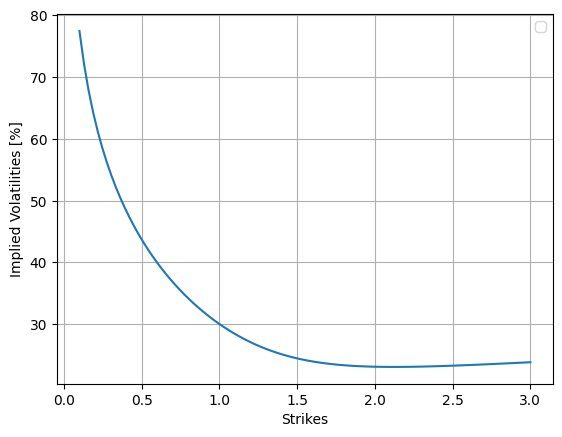

In [39]:
sabr_smile()

# Let's address real world Tesla data

In [14]:
import OptionLib as opt

In [15]:
ticker = opt.yf_get_chains('TSLA')
ticker.head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expDate,daysToExp
0,TSLA230310C00015000,2023-03-07 15:40:13+00:00,15.0,175.95,172.50,172.85,-4.350006,-2.412649,5.0,5.0,10.093754,True,REGULAR,USD,call,2023-03-10 23:59:59,3
1,TSLA230310C00020000,2023-03-07 15:40:13+00:00,20.0,170.95,167.50,167.85,-2.699997,-1.554850,5.0,4.0,8.890629,True,REGULAR,USD,call,2023-03-10 23:59:59,3
2,TSLA230310C00025000,2023-03-06 15:10:51+00:00,25.0,170.30,162.55,162.85,0.000000,0.000000,3.0,4.0,7.984375,True,REGULAR,USD,call,2023-03-10 23:59:59,3
3,TSLA230310C00030000,2023-03-06 20:55:00+00:00,30.0,164.25,157.55,157.85,0.000000,0.000000,5.0,8.0,7.250001,True,REGULAR,USD,call,2023-03-10 23:59:59,3
4,TSLA230310C00040000,2023-03-07 15:45:00+00:00,40.0,150.20,147.55,147.85,-1.900009,-1.249184,5.0,0.0,6.125002,True,REGULAR,USD,call,2023-03-10 23:59:59,3
5,TSLA230310C00050000,2023-03-06 19:43:37+00:00,50.0,145.02,137.55,137.90,0.000000,0.000000,5.0,102.0,4.187505,True,REGULAR,USD,call,2023-03-10 23:59:59,3
6,TSLA230310C00055000,2023-03-06 17:48:59+00:00,55.0,138.04,132.55,132.90,0.000000,0.000000,2.0,1.0,3.875000,True,REGULAR,USD,call,2023-03-10 23:59:59,3
7,TSLA230310C00060000,2023-02-28 19:07:43+00:00,60.0,149.00,127.55,127.95,0.000000,0.000000,NaN,1.0,3.968750,True,REGULAR,USD,call,2023-03-10 23:59:59,3
8,TSLA230310C00065000,2023-03-07 15:39:56+00:00,65.0,125.85,122.55,122.95,-11.150002,-8.138687,5.0,50.0,3.703126,True,REGULAR,USD,call,2023-03-10 23:59:59,3
9,TSLA230310C00070000,2023-03-07 20:10:41+00:00,70.0,119.68,117.55,117.95,-4.669998,-3.755527,4.0,7.0,3.453126,True,REGULAR,USD,call,2023-03-10 23:59:59,3


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expDate,daysToExp
0,TSLA230310C00015000,2023-03-07 15:40:13+00:00,15.0,175.95,172.50,172.85,-4.350006,-2.412649,5.0,5.0,10.093754,True,REGULAR,USD,call,2023-03-10 23:59:59,3
1,TSLA230310C00020000,2023-03-07 15:40:13+00:00,20.0,170.95,167.50,167.85,-2.699997,-1.554850,5.0,4.0,8.890629,True,REGULAR,USD,call,2023-03-10 23:59:59,3
2,TSLA230310C00025000,2023-03-06 15:10:51+00:00,25.0,170.30,162.55,162.85,0.000000,0.000000,3.0,4.0,7.984375,True,REGULAR,USD,call,2023-03-10 23:59:59,3
3,TSLA230310C00030000,2023-03-06 20:55:00+00:00,30.0,164.25,157.55,157.85,0.000000,0.000000,5.0,8.0,7.250001,True,REGULAR,USD,call,2023-03-10 23:59:59,3
4,TSLA230310C00040000,2023-03-07 15:45:00+00:00,40.0,150.20,147.55,147.85,-1.900009,-1.249184,5.0,0.0,6.125002,True,REGULAR,USD,call,2023-03-10 23:59:59,3
5,TSLA230310C00050000,2023-03-06 19:43:37+00:00,50.0,145.02,137.55,137.90,0.000000,0.000000,5.0,102.0,4.187505,True,REGULAR,USD,call,2023-03-10 23:59:59,3
6,TSLA230310C00055000,2023-03-06 17:48:59+00:00,55.0,138.04,132.55,132.90,0.000000,0.000000,2.0,1.0,3.875000,True,REGULAR,USD,call,2023-03-10 23:59:59,3
7,TSLA230310C00060000,2023-02-28 19:07:43+00:00,60.0,149.00,127.55,127.95,0.000000,0.000000,NaN,1.0,3.968750,True,REGULAR,USD,call,2023-03-10 23:59:59,3
8,TSLA230310C00065000,2023-03-07 15:39:56+00:00,65.0,125.85,122.55,122.95,-11.150002,-8.138687,5.0,50.0,3.703126,True,REGULAR,USD,call,2023-03-10 23:59:59,3
9,TSLA230310C00070000,2023-03-07 20:10:41+00:00,70.0,119.68,117.55,117.95,-4.669998,-3.755527,4.0,7.0,3.453126,True,REGULAR,USD,call,2023-03-10 23:59:59,3


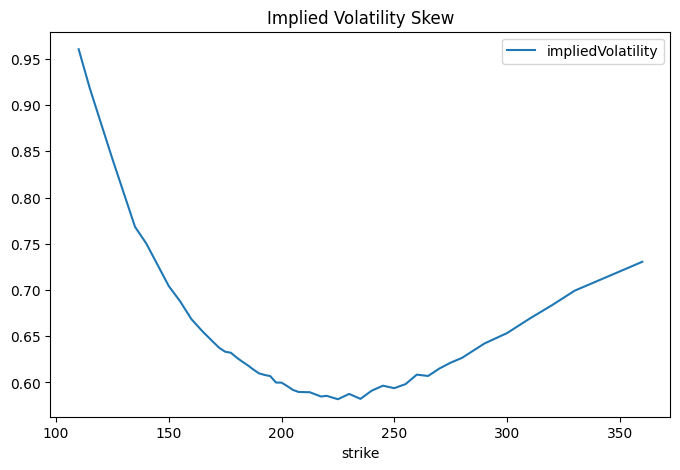

In [16]:
ticker_calls = ticker[ticker.optionType == 'call']

date = '2023-04-14'
threshold = 0.001
opt.plot_iv_skew(date=date, threshold = 0.001, df=ticker_calls)

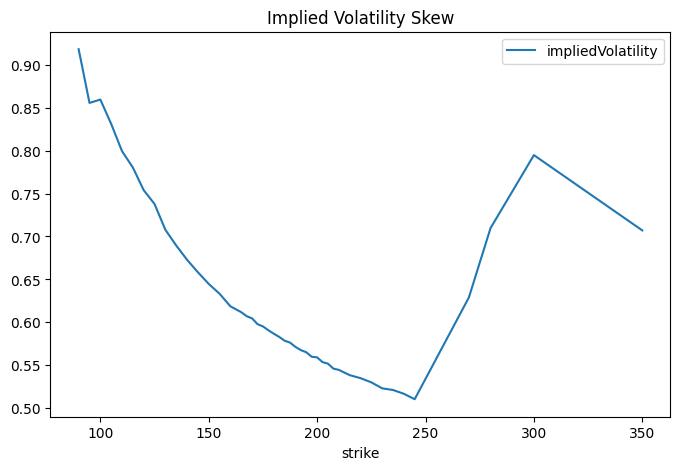

In [17]:
ticker_puts = ticker[ticker.optionType == 'put']

opt.plot_iv_skew(date=date, threshold = 0.001, df=ticker_puts)

In [18]:
ticker.optionType.unique()

array(['call', 'put'], dtype=object)

<AxesSubplot:title={'center':'Implied Volatility Skew'}, xlabel='strike'>

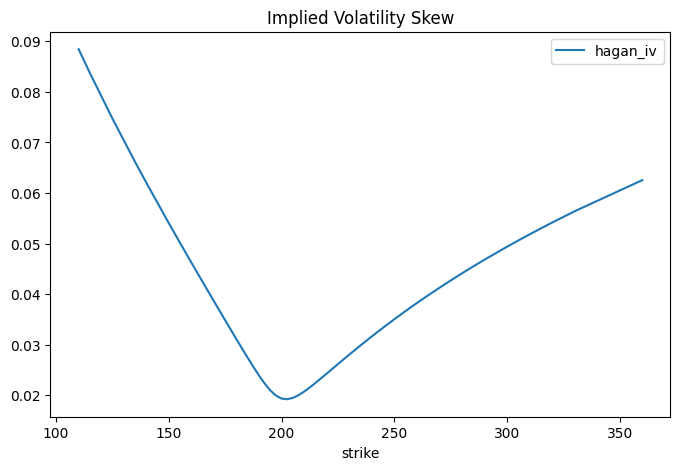

In [19]:
df = ticker_calls
alpha=.3
beta=.5
rho=-.5
nu=.4
f = 193.81
T = 11/252
time_y = 11/252


df_date = df[df["expDate"] == f'{date} 23:59:59'.format(date)]
df_date_ = df_date[df_date.impliedVolatility >= threshold]
df_date_['hagan_iv'] = hagan_iv(np.array(df_date_.strike), T, f, alpha, beta, rho, nu)

df_date_[["strike", "hagan_iv"]].set_index("strike").plot(title="Implied Volatility Skew", figsize=(8, 5))

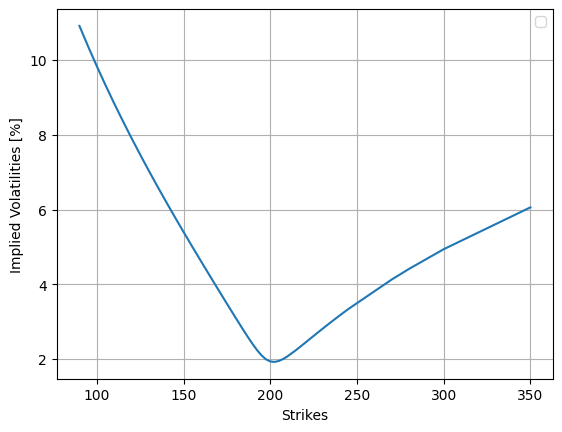

In [20]:
def sabr_smile(df, date, threshold = 0.001, alpha=.3, beta=.5, rho=-.5, nu=.4, time_y=11/252, f_0=193.81):

    df_date = df[df["expDate"] == f'{date} 23:59:59'.format(date)]
    df_date_ = df_date[df_date.impliedVolatility >= threshold]
    df_date_['hagan_iv'] = hagan_iv(np.array(df_date_.strike), T, f, alpha, beta, rho, nu)

    #df_date_[["strike", "hagan_iv"]].set_index("strike").plot(title="Implied Volatility Skew", figsize=(8, 5))
    strikes = np.array(df_date_.strike)
    legend = []

    ivs = hagan_iv(strikes, time_y, f_0, alpha, beta, rho, nu) * 100
    plt.plot(strikes, ivs)

    plt.xlabel('Strikes')
    plt.ylabel('Implied Volatilities [%]')
    plt.grid()
    plt.legend(legend)
    plt.show()

sabr_smile(df=ticker_puts, date='2023-04-14', threshold = 0.001)

# Calibration

Consider applying the conditional optimization algorithm in the trust region (method="trust-constr") with constraints specified as Bounds objects. Such method uses algorithms for calculating the expected minimum in the confidence region and are well suited for large-scale problems. This is what we are genuinely looking for.

In [24]:
dataframe = ticker_calls

In [25]:
market_vol = np.array(dataframe.impliedVolatility)
market_vol = market_vol.reshape((dataframe.shape[0], 1))

def func_minimize(alpha_rho_nu):

    alpha = alpha_rho_nu[0]
    rho = alpha_rho_nu[1]
    nu = alpha_rho_nu[2]

    K = dataframe.strike
    T = 11/252 # as experements show it does not really mate 11/252 or 11
    f = 193.81
    beta = 0.5 #initial_guess

    iv = hagan_iv(K, T, f, alpha, beta, rho, nu)

    difference = np.subtract(iv, market_vol)
    return sum(difference ** 2)


from scipy.optimize import minimize, rosen, rosen_der

alpha_rho_nu_guess = np.array([.03, -.5, .4])

bnds = [
    (0, None), # alpha
    (-1, 1), # rho
    (0, None) # nu
]

res = minimize(fun=func_minimize, x0=alpha_rho_nu_guess, bounds=bnds, method='trust-constr')

In [26]:
alpha, rho, nu = res.x[0], res.x[1], res.x[2]
res.x

array([10.31676583, -0.62035076,  0.99795023])

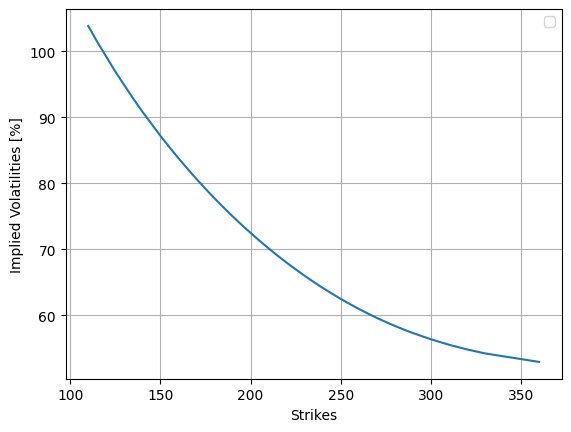

In [27]:
sabr_smile(df=ticker_calls, date='2023-04-14', threshold = 0.001, alpha=alpha, beta=.5, rho=rho, nu=nu, time_y=11/252, f_0=193.81)

## In fact, now it looks much more similar to the one from Yahoo Finance.
Let's create a SABR Class and summarize our calibration algorithm.

In [ ]:
from scipy.optimize import minimize

class SABR:
    def __init__(self, alpha, beta, rho, nu):
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.nu = nu

    def __str__(self):
        return f"alpha: {self.alpha}, " \
               f"beta: {self.beta}, " \
               f"rho: {self.rho}, " \
               f"nu: {self.nu}"

    def educated_guess(self, K, T, f, r=0):
        iv = hagan_iv(K, T, f, self.alpha, self.beta, self.rho, self.nu)
        opt_price = opt.BSM(r=r, spot=f, strike=K, time=T, sigma=iv, type='call')  #C = opt.BSM(K, F, T, r, sig)

    def calibrate(self, dataframe, beta=0.5, T=11/252, f=193.81,
                  alpha_rho_nu_guess = np.array([.03, -.5, .4]), method='trust-constr', setparams=True):

        market_vol = np.array(dataframe.impliedVolatility)
        market_vol = market_vol.reshape((dataframe.shape[0], 1))

        K = dataframe.strike

        def func_minimize(alpha_rho_nu):

            alpha = alpha_rho_nu[0]
            rho = alpha_rho_nu[1]
            nu = alpha_rho_nu[2]

            iv = hagan_iv(K, T, f, alpha, beta, rho, nu)

            difference = np.subtract(iv, market_vol)
            return sum(difference ** 2)

        res = minimize(fun=func_minimize, x0=alpha_rho_nu_guess, bounds=bnds, method=method)
        alpha_calib, rho_calib, nu_calib = res.x[0], res.x[1], res.x[2]

        if setparams:
            self.alpha = alpha_calib
            self.rho = rho_calib
            self.nu = nu_calib

        return alpha, rho, nu

In [ ]:
p1 = SABR(1, 2, 3, 4)
alpha, rho, nu = p1.calibrate(dataframe)